In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = "https://www.openml.org/data/download/22102255/dataset"
data = requests.get(url)

In [ ]:
with open('dataset.txt','wb') as f:
    f.write(data.content)

In [ ]:
dataset = []

with open("dataset.txt","r") as f:
    for line in f.read().split("\n"):
        if (line.startswith("@") or line.startswith("%") or line == ""):
            continue
        dataset.append(line)

In [ ]:
dataset

In [ ]:
columns = []

with open("dataset.txt","r") as f:
    for line in f.read().split("\n"):
        if line.startswith("@ATTRIBUTE"):
            columns.append(line.split(" ")[1])

In [ ]:
columns

In [ ]:
with open("CSGO.csv","w") as f:
    f.write(",".join(columns))
    f.write("\n")
    f.write("\n".join(dataset))

In [2]:
df = pd.read_csv('CSGO.csv')

In [ ]:
df.shape

In [3]:
df["round_winner"] = df.round_winner.astype('category').cat.codes

In [ ]:
df

In [4]:
df['map'] = df.map.astype('category').cat.codes
df['bomb_planted'] = df.bomb_planted.astype('category').cat.codes

In [23]:
correlation = df.corr()['round_winner']

selected_columns = correlation[(abs(correlation) > 0.01)].index.tolist()

df_selected = df[selected_columns]

In [24]:
len(selected_columns)


71

In [25]:
df_selected

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,1
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,1


<AxesSubplot:>

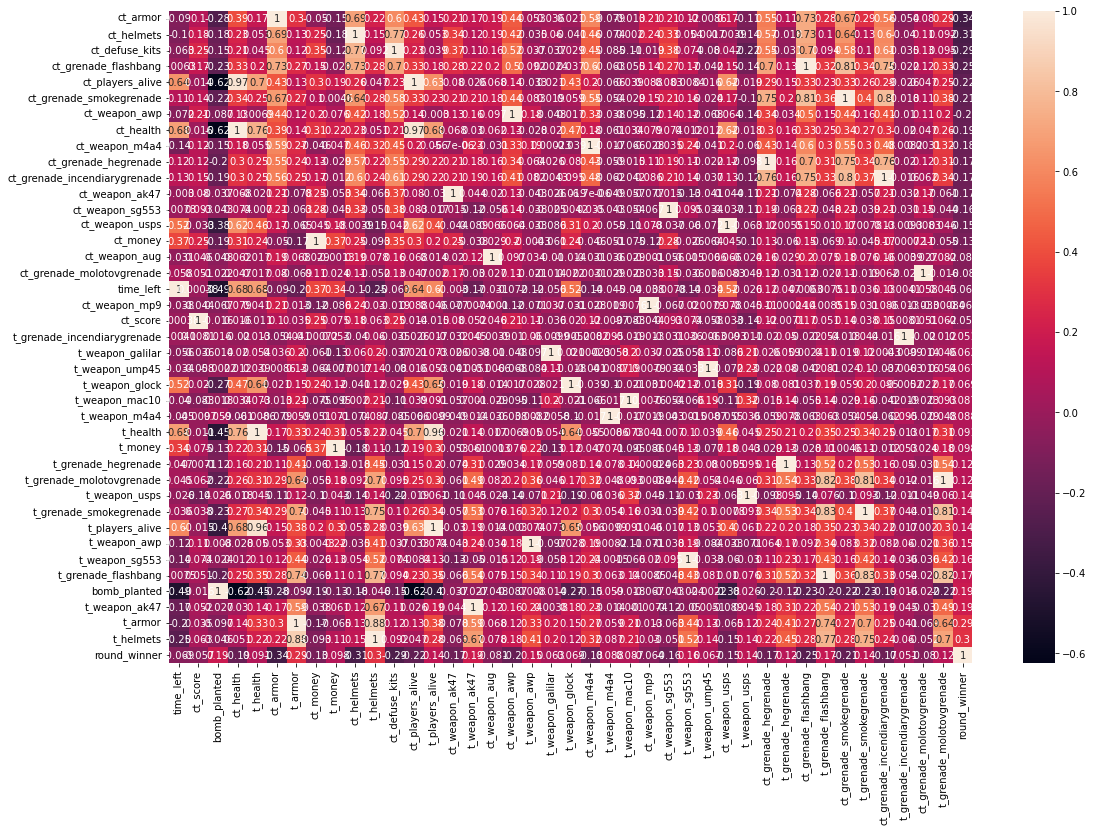

In [6]:
plt.figure(figsize=(18,12)) 
sns.heatmap(df_selected.corr().sort_values(by="round_winner"),annot=True)

array([[<AxesSubplot:title={'center':'time_left'}>,
        <AxesSubplot:title={'center':'ct_score'}>,
        <AxesSubplot:title={'center':'bomb_planted'}>,
        <AxesSubplot:title={'center':'ct_health'}>,
        <AxesSubplot:title={'center':'t_health'}>,
        <AxesSubplot:title={'center':'ct_armor'}>],
       [<AxesSubplot:title={'center':'t_armor'}>,
        <AxesSubplot:title={'center':'ct_money'}>,
        <AxesSubplot:title={'center':'t_money'}>,
        <AxesSubplot:title={'center':'ct_helmets'}>,
        <AxesSubplot:title={'center':'t_helmets'}>,
        <AxesSubplot:title={'center':'ct_defuse_kits'}>],
       [<AxesSubplot:title={'center':'ct_players_alive'}>,
        <AxesSubplot:title={'center':'t_players_alive'}>,
        <AxesSubplot:title={'center':'ct_weapon_ak47'}>,
        <AxesSubplot:title={'center':'t_weapon_ak47'}>,
        <AxesSubplot:title={'center':'ct_weapon_aug'}>,
        <AxesSubplot:title={'center':'ct_weapon_awp'}>],
       [<AxesSubplot:title={'c

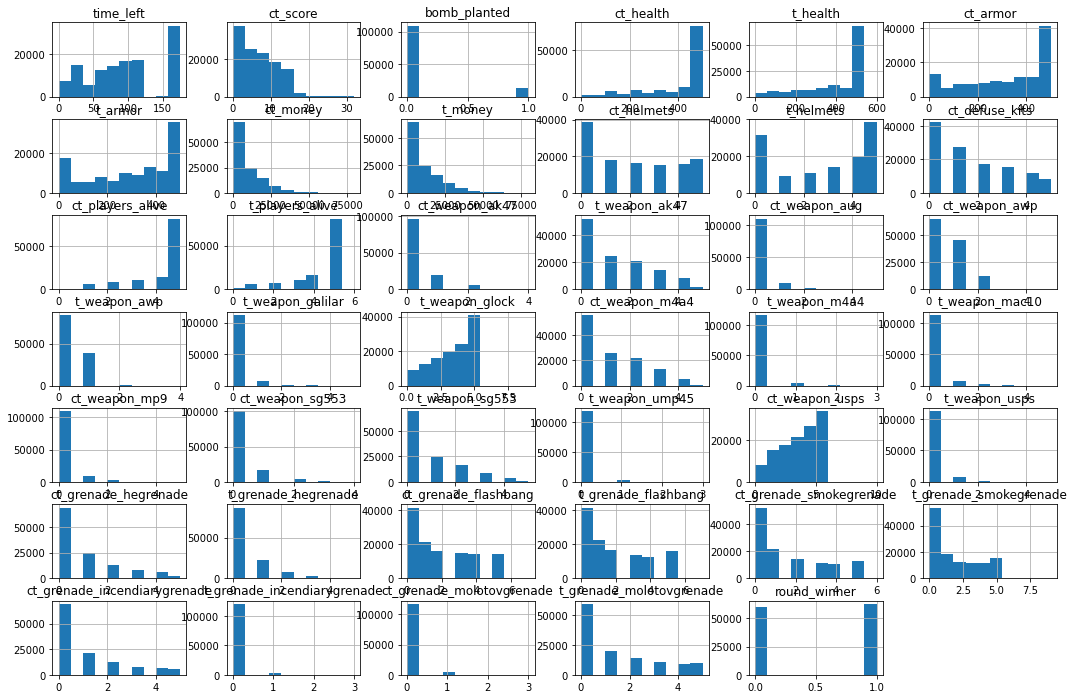

In [7]:
df_selected.hist(figsize=(18,12))

In [26]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 71 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  int8   
 4   bomb_planted                  122410 non-null  int8   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [27]:
from sklearn.model_selection import train_test_split

x,y = df_selected.drop(["round_winner"],axis=1),df_selected.round_winner



In [28]:
x

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,6,1,200.0,242.0,195.0,359.0,100.0,...,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
122406,174.93,11.0,15.0,6,0,500.0,500.0,95.0,175.0,11500.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
122407,114.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,4.0,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0
122408,94.93,11.0,15.0,6,0,500.0,500.0,495.0,475.0,1200.0,...,1.0,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0


In [29]:
y

0         0
1         0
2         0
3         0
4         0
         ..
122405    1
122406    1
122407    1
122408    1
122409    1
Name: round_winner, Length: 122410, dtype: int8

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [32]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
knn = KNeighborsClassifier()

knn.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [34]:
knn.score(X_test_scaled,y_test)

0.8319173270157667

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_neighbors":list(range(5,17,2)),
    "weights":['uniform','distance']
}

knn = KNeighborsClassifier(n_jobs=4)

clf = RandomizedSearchCV(knn,param_grid,n_jobs=4,n_iter=3,verbose=2,cv=3)
clf.fit(X_train_scaled,y_train)

In [ ]:
clf.best_estimator_

In [ ]:
knn = clf.best_estimator_

In [ ]:
knn.score(X_test_scaled,y_test)

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV

In [39]:
model = RandomForestClassifier(n_jobs=4)


In [40]:
model.fit(X_train_scaled,y_train)

RandomForestClassifier(n_jobs=4)

In [41]:
model.score(X_test_scaled,y_test)

0.8781553794624622

In [44]:
X_train.shape

(97928, 70)

In [42]:
from tensorflow import keras


In [45]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(70,)))
model.add(keras.layers.Dense(200,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))

2023-03-05 01:18:38.326210: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-05 01:18:38.326475: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-05 01:18:38.326489: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (garou): /proc/driver/nvidia/version does not exist
2023-03-05 01:18:38.327394: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [46]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [47]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)

X_train_scaled_train,
X_valid,y_train_train,y_valid = train_test_split(X_train_scaled,y_train,
                                test_size=0.15)

In [48]:
model.fit(X_train_scaled_train,y_train_train,epochs=30,
          callbacks=[early_stopping_cb],
          validation_data=(X_valid,y_valid))

Epoch 1/30
2602/2602 [==============================] - 3s 991us/step - loss: 0.4593 - accuracy: 0.7489 - val_loss: 0.4542 - val_accuracy: 0.7519
Epoch 2/30
2602/2602 [==============================] - 2s 936us/step - loss: 0.4380 - accuracy: 0.7629 - val_loss: 0.4387 - val_accuracy: 0.7631
Epoch 3/30
2602/2602 [==============================] - 2s 939us/step - loss: 0.4267 - accuracy: 0.7706 - val_loss: 0.4313 - val_accuracy: 0.7707
Epoch 4/30
2602/2602 [==============================] - 3s 1ms/step - loss: 0.4148 - accuracy: 0.7807 - val_loss: 0.4290 - val_accuracy: 0.7715
Epoch 5/30
2602/2602 [==============================] - 3s 1ms/step - loss: 0.4009 - accuracy: 0.7914 - val_loss: 0.4206 - val_accuracy: 0.7824
Epoch 6/30
2602/2602 [==============================] - 3s 1ms/step - loss: 0.3852 - accuracy: 0.8039 - val_loss: 0.4190 - val_accuracy: 0.7832
Epoch 7/30
2602/2602 [==============================] - 3s 1ms/step - loss: 0.3677 - accuracy: 0.8165 - val_loss: 0.4236 - val_acc

In [49]:
model.evaluate(X_test_scaled,y_test)

766/766 [==============================] - 0s 560us/step - loss: 0.4367 - accuracy: 0.8224


[0.4367014765739441, 0.8224409818649292]